# <div align="right">Data Visualization 
### <div align="right"> *Followblindly*

# 1 - Basic Data Visualization Tools

## Importing Datasets

In [ ]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris['SepalLengthCm'] = pd.to_numeric(iris['SepalLengthCm'])
iris['SepalWidthCm'] = pd.to_numeric(iris['SepalWidthCm'])

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head() #View first 5 data rows

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
wine_reviews.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [ ]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


## Pandas Profiling

Pandas profiling is a library that generates interactive reports with our data, we can see the distribution of the data, the types of data, possible problems it might have. It is very easy to use, with only 3 lines we can generate a report that we can send to anyone and that can be used even if you do not know programming.

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(iris)
prof.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Matplotlib  Visualization

Matplotlib is the most basic library for visualizing data graphically. It includes many of the graphs that we can think of. Just because it is basic does not mean that it is not powerful, many of the other data visualization libraries we are going to talk about are based on it. Matplotlib’s charts are made up of two main components, the axes (the lines that delimit the area of the chart) and the figure (where we draw the axes, titles and things that come out of the area of the axes).

In [ ]:
import matplotlib.pyplot as plt

### Scatter Plot
To create a scatter plot in Matplotlib we can use the **scatter** method. We will also create a figure and an axis using **plt.subplots** so we can give our plot a title and labels.

Text(0, 0.5, 'SepalWidthCm')

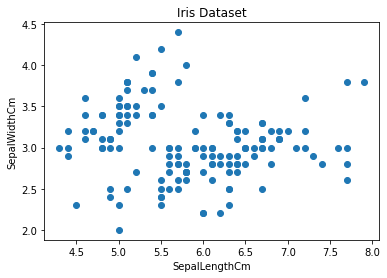

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')

Text(0, 0.5, 'SepalWidthCm')

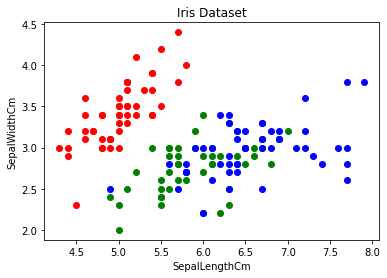

In [ ]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['SepalLengthCm'])):
    ax.scatter(iris['SepalLengthCm'][i], iris['SepalWidthCm'][i],color=colors[iris['Species'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')

### Line Chart
In Matplotlib we can create a line chart by calling the **plot** method. We can also plot multiple columns in one graph, by looping through the columns we want and plotting each column on the same axis.

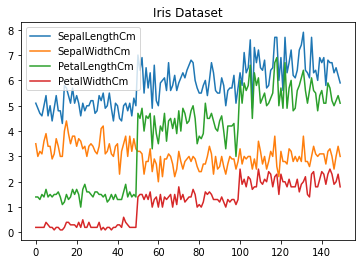

In [ ]:
# get columns to plot
columns = iris.columns.drop(['Species','Id'])
# create x data
x_data = range(0, iris.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

### Histogram

In Matplotlib we can create a Histogram using the **hist** method. If we pass it categorical data like the points column from the wine-review dataset it will automatically calculate how often each class occurs.

Text(0, 0.5, 'Frequency')

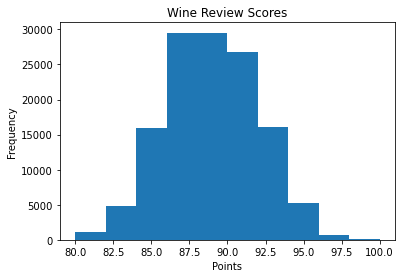

In [ ]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_reviews['points'])
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

### Bar Chart

A bar chart can be created using the **bar** method. The bar-chart isn’t automatically calculating the frequency of a category so we are going to use pandas **value_counts** function to do this. The bar-chart is useful for categorical data that doesn’t have a lot of different categories (less than 30) because else it can get quite messy.

Text(0, 0.5, 'Frequency')

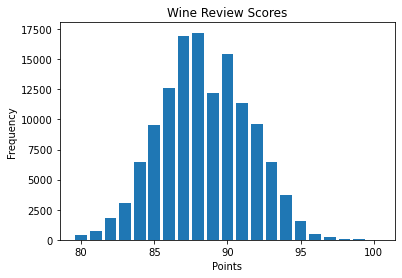

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = wine_reviews['points'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

## Pandas Visualization

Pandas is an open source high-performance, easy-to-use library providing data structures, such as dataframes, and data analysis tools like the visualization tools we will use. Pandas Visualization makes it really easy to create plots out of a pandas dataframe and series. It also has a higher level API than Matplotlib and therefore we need less code for the same results.

In [ ]:
import pandas as pd

### Scatter Plot

To create a scatter plot in Pandas we can call **\<dataset>.plot.scatter()** and pass it two arguments, the name of the x-column as well as the name of the y-column. Optionally we can also pass it a title.

<AxesSubplot:title={'center':'Iris Dataset'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

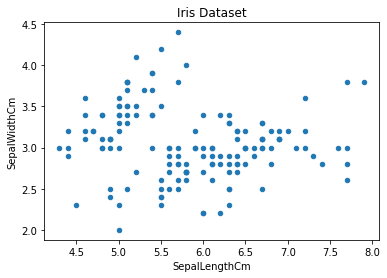

In [ ]:
iris.plot.scatter(x='SepalLengthCm', y='SepalWidthCm', title='Iris Dataset')

### Line Chart

To create a line-chart in Pandas we can call **\<dataframe>.plot.line()**. Whilst in Matplotlib we needed to loop-through each column we wanted to plot, in Pandas we don’t need to do this because it automatically plots all available numeric columns (at least if we don’t specify a specific column/s).

<AxesSubplot:title={'center':'Iris Dataset'}>

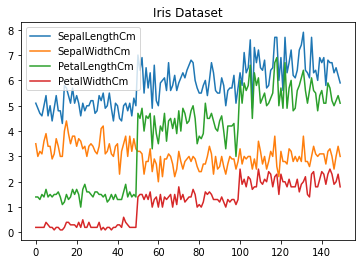

In [ ]:
iris.drop(['Species','Id'], axis=1).plot.line(title='Iris Dataset')

### Histogram

In Pandas, we can create a Histogram with the **plot.hist** method. There aren’t any required arguments but we can optionally pass some like the bin size.

<AxesSubplot:ylabel='Frequency'>

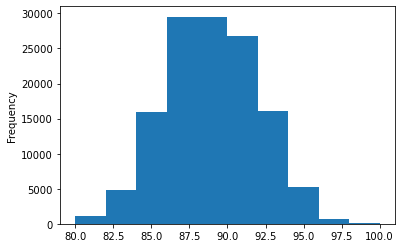

In [ ]:
wine_reviews['points'].plot.hist()

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

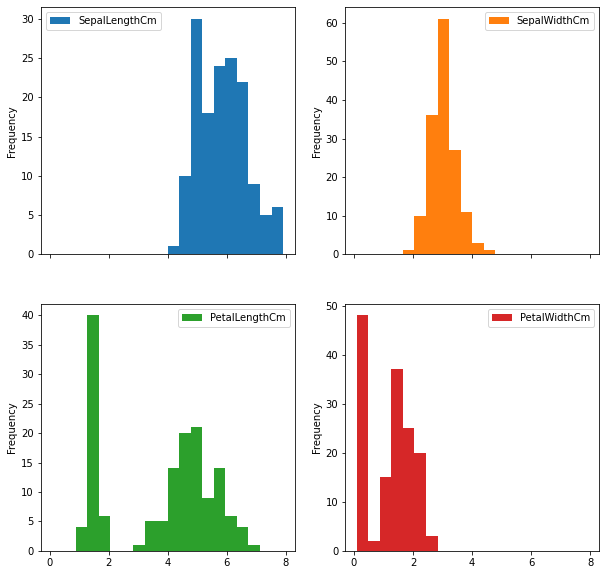

In [ ]:
iris.drop(['Species','Id'], axis=1).plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

### Bar Chart

To plot a bar-chart we can use the **plot.bar()** method, but before we can call this we need to get our data. For this we will first count the occurrences using the **value_count()** method and then sort the occurrences from smallest to largest using the **sort_index()** method.

<AxesSubplot:>

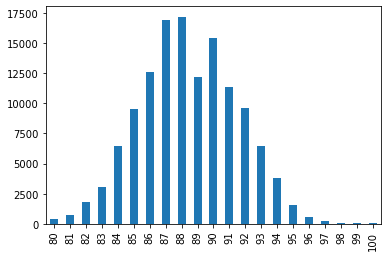

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

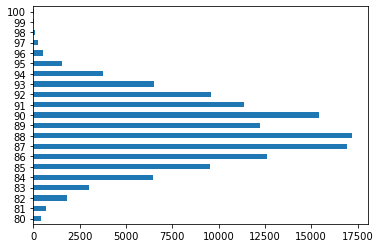

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

<AxesSubplot:xlabel='country'>

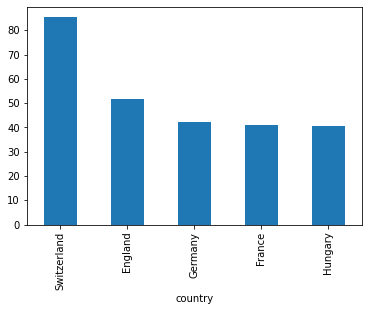

In [ ]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

## Seaborn Visualization

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive graphs. Seaborn has a lot to offer. You can create graphs in one line that would take you multiple tens of lines in Matplotlib. Its standard designs are awesome and it also has a nice interface for working with pandas dataframes.

In [ ]:
import seaborn as sns

### Scatter Plot

We can use the **.scatterplot** method for creating a scatterplot, and just as in Pandas we need to pass it the column names of the x and y data, but now we also need to pass the data as an additional argument because we aren’t calling the function on the data directly as we did in Pandas.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

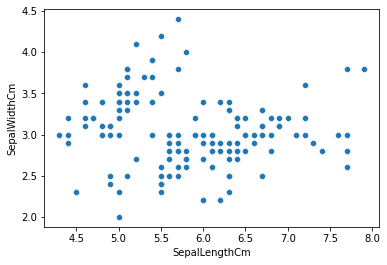

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

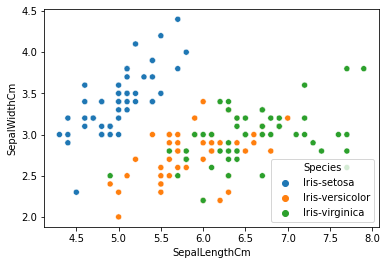

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)

### Line Chart

To create a line-chart the **sns.lineplot** method can be used. The only required argument is the data, which in our case are the four numeric columns from the Iris dataset. We could also use the **sns.kdeplot** method which rounds of the edges of the curves and therefore is cleaner if you have a lot of outliers in your dataset.

<AxesSubplot:>

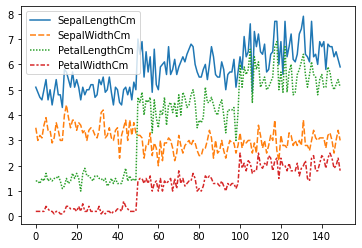

In [ ]:
sns.lineplot(data=iris.drop(['Species','Id'], axis=1))

### Histogram

To create a histogram in Seaborn we use the **sns.distplot** method. We need to pass it the column we want to plot and it will calculate the occurrences itself. We can also pass it the number of bins, and if we want to plot a gaussian kernel density estimate inside the graph.

/Users/followblindly/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points'>

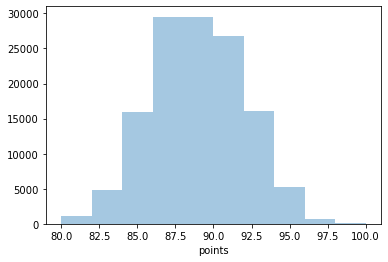

In [ ]:
sns.distplot(wine_reviews['points'], bins=10, kde=False)

<AxesSubplot:xlabel='points', ylabel='Density'>

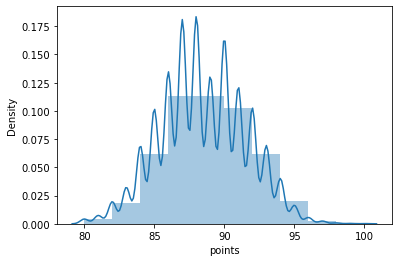

In [ ]:
sns.distplot(wine_reviews['points'], bins=10, kde=True)

### Bar Chart

In Seaborn a bar-chart can be created using the **sns.countplot** method and passing it the data.

/Users/followblindly/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='points', ylabel='count'>

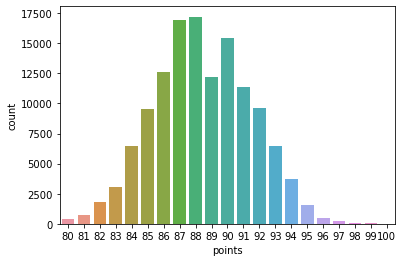

In [ ]:
sns.countplot(wine_reviews['points'])

### Box Plot

A Box Plot is a graphical method of displaying the five-number summary. We can create box plots using seaborns **sns.boxplot** method and passing it the data as well as the x and y column name.

/Users/followblindly/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='points', ylabel='price'>

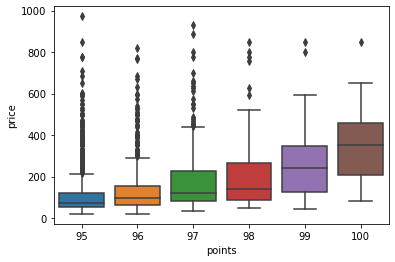

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

### Heatmap

A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset. To get the correlation of the features inside a dataset we can call **\<dataset>.corr()*, which is a Pandas dataframe method. This will give us the correlation matrix.

<AxesSubplot:>

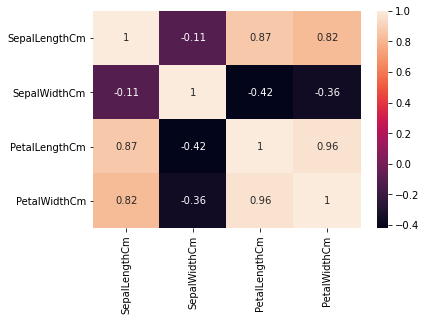

In [ ]:
sns.heatmap(iris.drop(['Species','Id'], axis=1).corr(), annot=True)

### Faceting

Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure. Faceting is really helpful if you want to quickly explore your dataset. To use one kind of faceting in Seaborn we can use the **FacetGrid**. First of all, we need to define the **FacetGrid** and pass it our data as well as a row or column, which will be used to split the data. Then we need to call the **map** function on our **FacetGrid** object and define the plot type we want to use, as well as the column we want to graph.

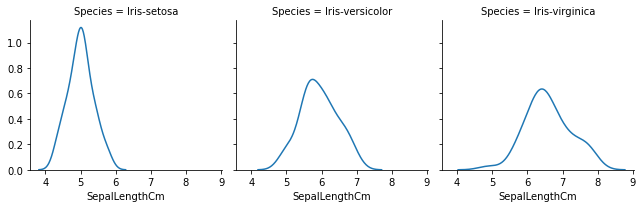

In [ ]:
g = sns.FacetGrid(iris, col='Species')
g = g.map(sns.kdeplot, 'SepalLengthCm')

### Pairplot

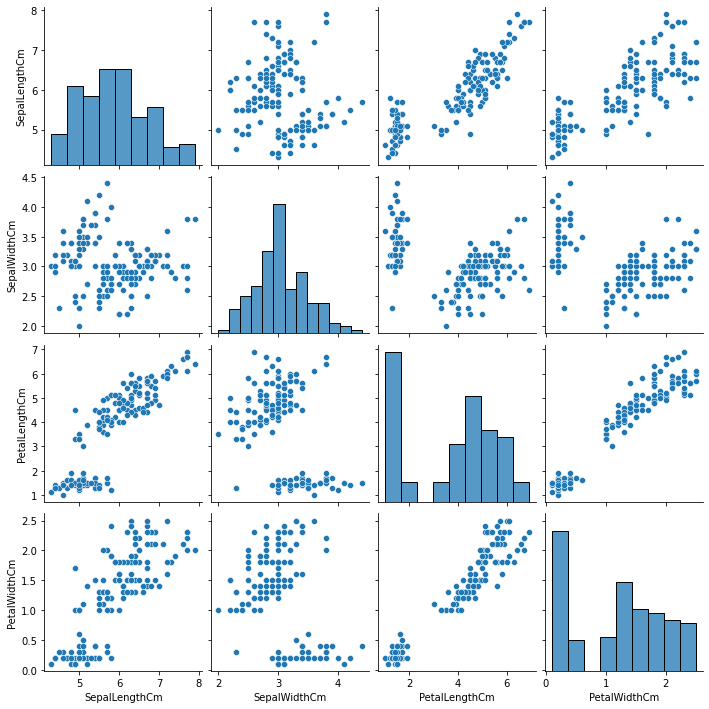

In [ ]:
sns.pairplot(iris.drop(['Species','Id'], axis=1))

### Reference

$[1] \ \ \ \ Tanner, G. (2019, March 6). Introduction to Data Visualization in Python. Medium. https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed. $

In [1]:
%%shell
jupyter nbconvert --to html /content/1_Basic_Data_Visualization_Tools.ipynb

[NbConvertApp] Converting notebook /content/1_Basic_Data_Visualization_Tools.ipynb to html
[NbConvertApp] Writing 892649 bytes to /content/1_Basic_Data_Visualization_Tools.html
